In [1]:
import librosa
import datasets

c:\Users\emila\Documents\koulu\opinnaytetyo\project\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
set1 = datasets.load_from_disk('../data/hf')

In [3]:
sample = set1['train'][0]

In [4]:
audio_array = sample['audio']['array']
sr = sample['audio']['sampling_rate']
print(f'{len(audio_array)} {sr}')

224640 48000


In [5]:
max_val = max(audio_array)
min_val = min(audio_array)
print(f'max{max_val} min{min_val}')

max0.2524890899658203 min-0.30175548791885376


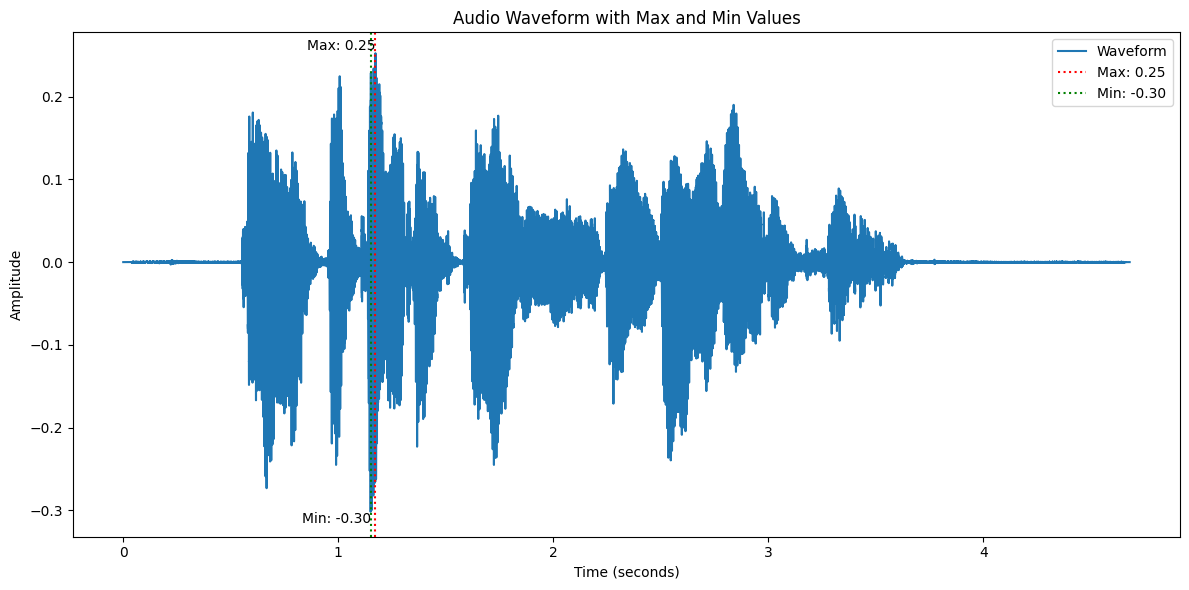

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def plot_wave(audio_array, sr, plt_name='wav1', title='Audio Waveform with Max and Min Values'):
    
    min_val = min(audio_array)
    max_val = max(audio_array)

    duration = len(audio_array) / sr
    t = np.linspace(0, duration, len(audio_array))

    max_index = np.argmax(audio_array)
    min_index = np.argmin(audio_array)
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, audio_array, label='Waveform')

    plt.axvline(x=t[max_index], color='r', linestyle=':', label=f'Max: {max_val:.2f}')
    plt.axvline(x=t[min_index], color='g', linestyle=':', label=f'Min: {min_val:.2f}')

    plt.text(t[max_index], max_val, f'Max: {max_val:.2f}', 
             verticalalignment='bottom', horizontalalignment='right')
    plt.text(t[min_index], min_val, f'Min: {min_val:.2f}', 
             verticalalignment='top', horizontalalignment='right')

    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.ylim(min_val * 1.1, max_val * 1.1)

    plt.tight_layout()
    plt.savefig(f'../output/{plt_name}.png')
    plt.show()

plot_wave(audio_array, sr)



In [7]:
audio_array = librosa.resample(audio_array, orig_sr=sr, target_sr=16000)
sr = 16000
print(f'len {len(audio_array)} sr{16000}')

len 74880 sr16000


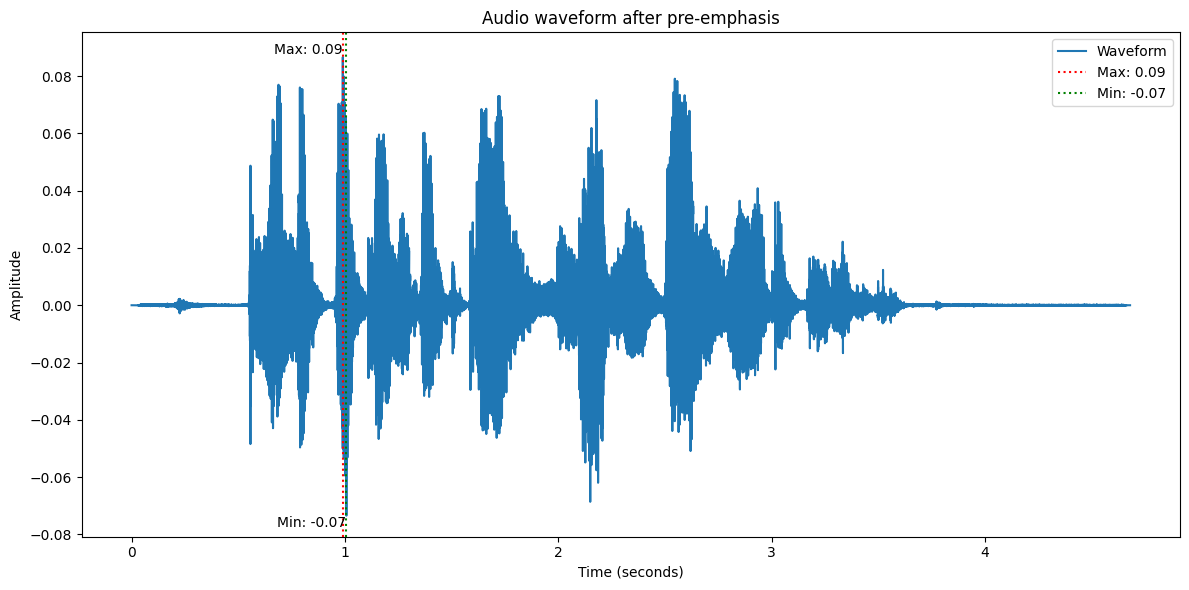

In [8]:
pre_e = librosa.effects.preemphasis(audio_array, coef=0.97)
plot_wave(pre_e, sr, plt_name='wav2', title='Audio waveform after pre-emphasis')

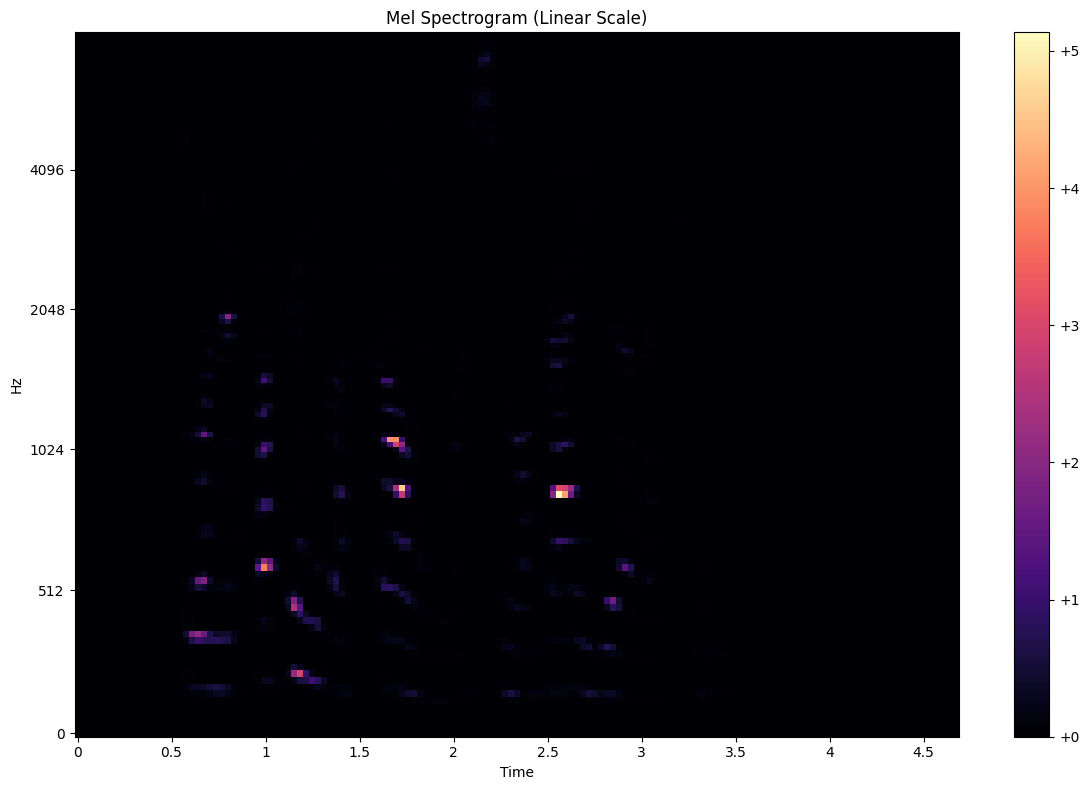

In [9]:
import librosa.display
def plot_melspec(audio, sr, title):
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(mel_spec, sr=16000, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f')
    plt.title('Mel Spectrogram (Linear Scale)')
    plt.tight_layout()
    plt.savefig(f'../output/{title}.png')
    plt.show()

plot_melspec(pre_e, sr, 'Mel-spectrogram')